In [2]:
# CSS style setting
!wget http://bit.ly/3ZLyF82 -O CSS.css -q
    
from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)

## Traffic Sign Detection Using Yolov8

### Install and import Toolkits

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.9/756.9 kB 21.1 MB/s eta 0:00:0000:01


In [4]:
import os
import glob
import matplotlib.pyplot as plt
import cv2
import requests
import random 
import numpy as np
import pandas as pd
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video
import warnings 
warnings.filterwarnings('ignore')

### Show Sample From Train Data

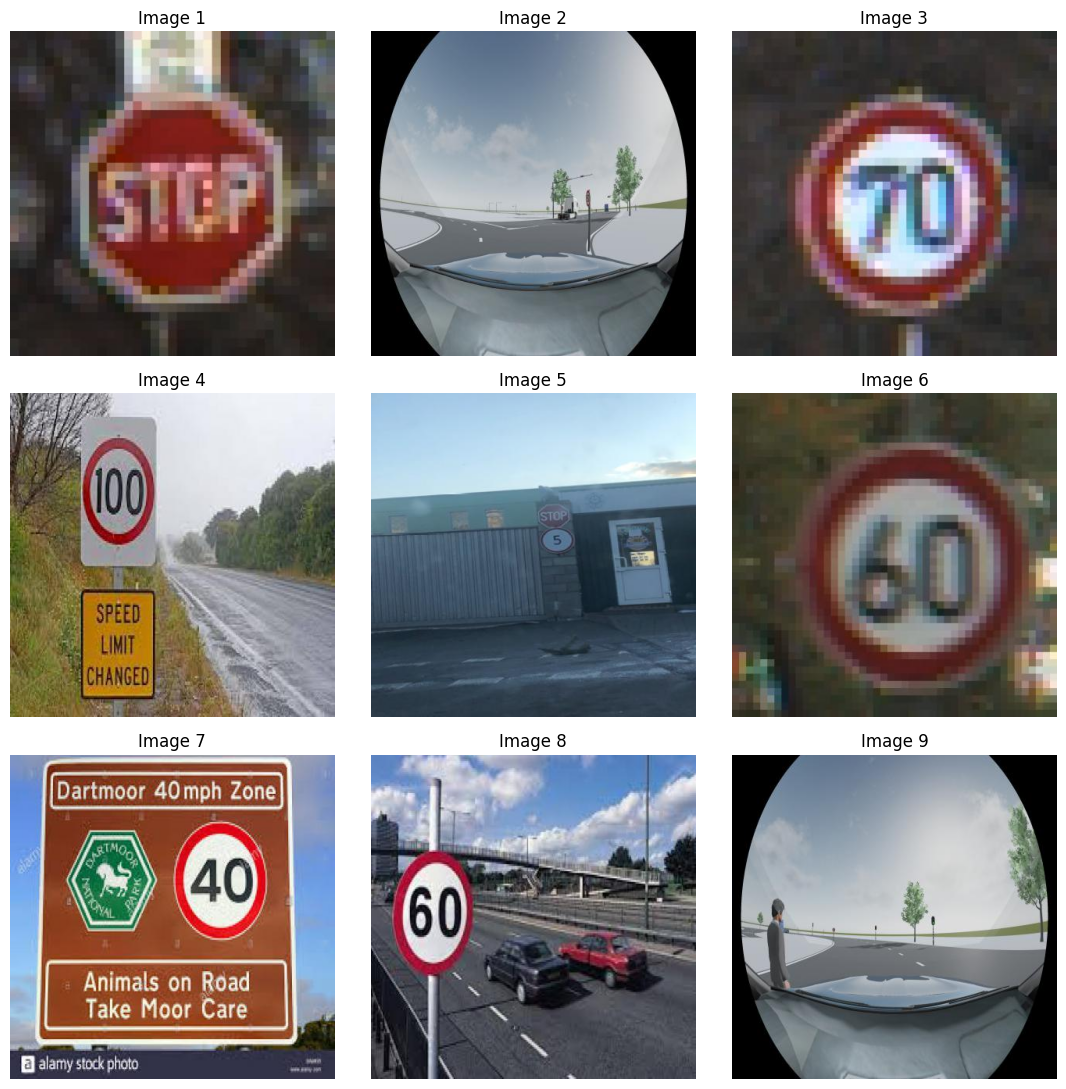

In [5]:
Image_dir = '/kaggle/input/cardetection/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

#### Get The Shape Of The Image 

In [6]:
img = cv2.imread("/kaggle/input/cardetection/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg")
print(f"The Shape Of The Image Is: {img.shape} Which Means That We Have Dimension {img.shape[0]} Height X {img.shape[1]} Weights With 3 Channels")

The Shape Of The Image Is: (416, 416, 3) Which Means That We Have Dimension 416 Height X 416 Weights With 3 Channels


### Pre-Trained YOLOV8 For Detect Traffic Signs

100%|██████████| 6.23M/6.23M [00:00<00:00, 101MB/s]



image 1/1 /kaggle/input/cardetection/train/images/000008_jpg.rf.bd6ae6db0f8c0eb727706bc322ce21ae.jpg: 416x416 1 stop sign, 8.6ms
Speed: 6.8ms preprocess, 8.6ms inference, 3414.7ms postprocess per image at shape (1, 3, 416, 416)


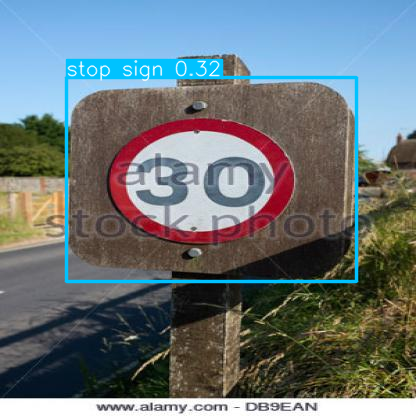

In [7]:
## Define pre-trained yolov8 model
model = YOLO("yolov8n.pt")

#predict an object
img = '/kaggle/input/cardetection/train/images/000008_jpg.rf.bd6ae6db0f8c0eb727706bc322ce21ae.jpg'
pred = model.predict(source = img , imgsz = (416))
#Show the result
plot = pred[0].plot()
plot = cv2.cvtColor(plot , cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [8]:
#Build from yaml and transfer weights
final_model = YOLO("yolov8n.yaml").load("yolov8n.pt")

#Training the final model
final_model_tr = final_model.train(data = "/kaggle/input/cardetection/data.yaml" ,epochs = 100 , imgsz = 416 , batch= 16 , 
                                  lr0 = 0.0001 , dropout = 0.25 , device = 0)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.16 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/cardetection/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.25, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_c

100%|██████████| 755k/755k [00:00<00:00, 18.2MB/s]
2024-05-17 09:38:26,468	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-17 09:38:27,277	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/cardetection/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:20<00:00, 169.05it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:04<00:00, 172.07it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.17G     0.8257      3.159      1.081         23        416: 100%|██████████| 221/221 [00:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  5.06it/s]

                   all        801        944      0.226       0.48      0.245      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.11G     0.7288      2.192      1.022         18        416: 100%|██████████| 221/221 [00:27<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.97it/s]


                   all        801        944      0.332        0.5      0.329      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.11G     0.7457      1.952      1.016         28        416: 100%|██████████| 221/221 [00:26<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.82it/s]


                   all        801        944       0.39      0.535      0.408      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.02G     0.7066      1.689     0.9987         19        416: 100%|██████████| 221/221 [00:26<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.90it/s]


                   all        801        944      0.569      0.621      0.612      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.03G     0.6852      1.505     0.9838         26        416: 100%|██████████| 221/221 [00:26<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.76it/s]

                   all        801        944      0.645      0.669      0.668      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       1.1G     0.6803      1.368     0.9843         16        416: 100%|██████████| 221/221 [00:26<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.91it/s]


                   all        801        944      0.725      0.702      0.733      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.02G     0.6555      1.241     0.9747         20        416: 100%|██████████| 221/221 [00:26<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.91it/s]


                   all        801        944      0.807      0.691      0.774      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.12G     0.6641      1.147     0.9741         25        416: 100%|██████████| 221/221 [00:26<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.00it/s]


                   all        801        944      0.777      0.743      0.794      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.03G     0.6455      1.106     0.9672         23        416: 100%|██████████| 221/221 [00:26<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.90it/s]

                   all        801        944      0.809      0.712      0.796      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       1.1G     0.6374      1.056     0.9658         27        416: 100%|██████████| 221/221 [00:26<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.16it/s]


                   all        801        944      0.835      0.768      0.831      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.02G     0.6309     0.9866     0.9591         21        416: 100%|██████████| 221/221 [00:27<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.97it/s]

                   all        801        944      0.832       0.78      0.831      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.11G     0.6269     0.9563     0.9562         18        416: 100%|██████████| 221/221 [00:26<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.80it/s]


                   all        801        944      0.884       0.77      0.853      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.03G     0.6128     0.9244     0.9514         22        416: 100%|██████████| 221/221 [00:27<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.90it/s]


                   all        801        944      0.879      0.788      0.859      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       1.1G     0.6176     0.9193     0.9539         28        416: 100%|██████████| 221/221 [00:26<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.16it/s]


                   all        801        944      0.892      0.788      0.861      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.03G     0.6131      0.889     0.9512         17        416: 100%|██████████| 221/221 [00:27<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.82it/s]


                   all        801        944      0.894      0.777      0.859      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.11G     0.6229     0.8698     0.9526         17        416: 100%|██████████| 221/221 [00:26<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.03it/s]

                   all        801        944      0.906      0.786      0.868       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.02G     0.6022     0.8394     0.9424         27        416: 100%|██████████| 221/221 [00:27<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.99it/s]


                   all        801        944      0.931        0.8      0.881      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       1.1G     0.5965     0.8316     0.9463         17        416: 100%|██████████| 221/221 [00:27<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.06it/s]


                   all        801        944      0.909      0.801      0.876      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.02G     0.5869     0.8057     0.9414         21        416: 100%|██████████| 221/221 [00:27<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.97it/s]


                   all        801        944      0.925      0.804      0.887      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.12G     0.5956     0.7749     0.9443         25        416: 100%|██████████| 221/221 [00:27<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.92it/s]


                   all        801        944      0.941      0.822      0.892       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.03G     0.5944     0.8009     0.9405         22        416: 100%|██████████| 221/221 [00:26<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.02it/s]


                   all        801        944      0.923       0.81      0.883      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       1.1G     0.5847     0.7699     0.9379         19        416: 100%|██████████| 221/221 [00:26<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.76it/s]


                   all        801        944      0.928      0.829      0.895      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.03G      0.583     0.7534     0.9378         26        416: 100%|██████████| 221/221 [00:26<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.66it/s]

                   all        801        944      0.936      0.822      0.894      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.12G     0.5894     0.7575     0.9397         25        416: 100%|██████████| 221/221 [00:27<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.95it/s]

                   all        801        944      0.939      0.831      0.899      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.02G       0.58     0.7359     0.9378         15        416: 100%|██████████| 221/221 [00:27<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.80it/s]

                   all        801        944      0.947      0.816      0.897      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       1.1G     0.5811      0.725     0.9356         19        416: 100%|██████████| 221/221 [00:27<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.84it/s]


                   all        801        944      0.934      0.823      0.896      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.03G     0.5709     0.7172      0.936         21        416: 100%|██████████| 221/221 [00:27<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.97it/s]


                   all        801        944      0.931      0.832      0.898      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.11G     0.5765     0.7068     0.9342         20        416: 100%|██████████| 221/221 [00:26<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.02it/s]

                   all        801        944      0.945      0.833      0.906      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.03G     0.5682     0.7049     0.9352         22        416: 100%|██████████| 221/221 [00:26<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.74it/s]

                   all        801        944      0.961      0.832      0.905      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       1.1G     0.5582      0.694     0.9329         18        416: 100%|██████████| 221/221 [00:27<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.98it/s]

                   all        801        944      0.953      0.825      0.903      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.03G     0.5686     0.6899     0.9326         22        416: 100%|██████████| 221/221 [00:26<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.72it/s]


                   all        801        944      0.926      0.846      0.907      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.11G     0.5551     0.6814     0.9298         24        416: 100%|██████████| 221/221 [00:26<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.90it/s]


                   all        801        944      0.917      0.822      0.893      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.03G     0.5579     0.6854     0.9263         21        416: 100%|██████████| 221/221 [00:26<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.96it/s]


                   all        801        944      0.944      0.856      0.909      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       1.1G     0.5595      0.672     0.9316         25        416: 100%|██████████| 221/221 [00:27<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.02it/s]


                   all        801        944       0.94      0.839      0.905      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.02G     0.5524     0.6604     0.9303         21        416: 100%|██████████| 221/221 [00:26<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.03it/s]


                   all        801        944      0.944      0.834      0.903      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.12G     0.5554     0.6559     0.9244         27        416: 100%|██████████| 221/221 [00:26<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]


                   all        801        944      0.928      0.845      0.908      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.03G      0.552     0.6383     0.9273         28        416: 100%|██████████| 221/221 [00:26<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.93it/s]


                   all        801        944      0.923      0.844      0.898      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       1.1G     0.5516     0.6367     0.9312         16        416: 100%|██████████| 221/221 [00:26<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.94it/s]


                   all        801        944      0.933      0.835      0.902      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.02G     0.5507     0.6392     0.9255         22        416: 100%|██████████| 221/221 [00:26<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.75it/s]


                   all        801        944      0.943      0.844      0.909      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.11G     0.5422      0.625     0.9238         25        416: 100%|██████████| 221/221 [00:26<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.05it/s]


                   all        801        944      0.948      0.832      0.905      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.03G     0.5364     0.6238     0.9252         24        416: 100%|██████████| 221/221 [00:26<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.92it/s]


                   all        801        944      0.936      0.848      0.913      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       1.1G     0.5406     0.6108       0.92         29        416: 100%|██████████| 221/221 [00:26<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.98it/s]


                   all        801        944      0.942      0.864      0.914       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.02G      0.531     0.6116     0.9214         25        416: 100%|██████████| 221/221 [00:26<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.92it/s]


                   all        801        944      0.945      0.865       0.92       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.11G     0.5424     0.6017     0.9202         14        416: 100%|██████████| 221/221 [00:27<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.96it/s]


                   all        801        944       0.94      0.854      0.914      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.02G     0.5303     0.5971      0.918         17        416: 100%|██████████| 221/221 [00:27<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.05it/s]

                   all        801        944      0.936      0.842      0.911      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         1G     0.5311     0.6005     0.9185         18        416: 100%|██████████| 221/221 [00:26<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.94it/s]


                   all        801        944      0.952       0.84      0.912      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.02G     0.5455     0.6089     0.9246         23        416: 100%|██████████| 221/221 [00:26<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.03it/s]


                   all        801        944      0.946      0.848      0.915      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.11G      0.524     0.5939     0.9175         20        416: 100%|██████████| 221/221 [00:26<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.87it/s]


                   all        801        944      0.932       0.86      0.918      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.03G      0.529     0.5947     0.9248         27        416: 100%|██████████| 221/221 [00:26<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.20it/s]


                   all        801        944      0.948      0.869      0.924      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       1.1G     0.5348     0.5873     0.9194         16        416: 100%|██████████| 221/221 [00:26<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.03it/s]

                   all        801        944      0.939      0.868      0.923      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.02G     0.5246       0.58      0.913         27        416: 100%|██████████| 221/221 [00:26<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.98it/s]

                   all        801        944      0.938      0.866      0.918      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.11G     0.5244     0.5736     0.9222         16        416: 100%|██████████| 221/221 [00:27<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.88it/s]


                   all        801        944      0.939      0.872      0.922      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.02G     0.5177     0.5629     0.9172         20        416: 100%|██████████| 221/221 [00:27<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.04it/s]


                   all        801        944      0.947      0.866      0.921      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       1.1G     0.5144     0.5677     0.9172         17        416: 100%|██████████| 221/221 [00:27<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.05it/s]


                   all        801        944      0.952      0.849      0.918      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.02G     0.5165     0.5516     0.9133         16        416: 100%|██████████| 221/221 [00:27<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.93it/s]


                   all        801        944      0.958      0.838      0.919      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.11G     0.5152     0.5472     0.9141         24        416: 100%|██████████| 221/221 [00:27<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.00it/s]


                   all        801        944      0.957      0.842      0.917      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.02G     0.5179     0.5623     0.9103         24        416: 100%|██████████| 221/221 [00:27<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.97it/s]

                   all        801        944      0.956       0.86      0.922      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.01G     0.5146     0.5485     0.9126         26        416: 100%|██████████| 221/221 [00:27<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.99it/s]

                   all        801        944      0.957      0.869      0.925      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.02G     0.5103     0.5434      0.914         27        416: 100%|██████████| 221/221 [00:27<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.88it/s]


                   all        801        944      0.965      0.845      0.919      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.11G     0.5106     0.5471     0.9159         17        416: 100%|██████████| 221/221 [00:27<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.93it/s]


                   all        801        944      0.941      0.873      0.923      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.02G     0.5114     0.5395     0.9079         17        416: 100%|██████████| 221/221 [00:27<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.12it/s]


                   all        801        944      0.929      0.873      0.917        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       1.1G     0.5038     0.5287     0.9103         20        416: 100%|██████████| 221/221 [00:27<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.09it/s]


                   all        801        944      0.952      0.854       0.92      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.02G     0.5074     0.5432     0.9119         17        416: 100%|██████████| 221/221 [00:27<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.61it/s]


                   all        801        944      0.926      0.884      0.924      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.11G     0.5115     0.5395     0.9148         21        416: 100%|██████████| 221/221 [00:27<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.10it/s]

                   all        801        944       0.93      0.869      0.919      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.02G     0.5011     0.5309     0.9096         17        416: 100%|██████████| 221/221 [00:27<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.00it/s]


                   all        801        944      0.937      0.873      0.926      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       1.1G     0.5036     0.5262     0.9127         26        416: 100%|██████████| 221/221 [00:27<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.86it/s]


                   all        801        944      0.965      0.866      0.929      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.03G     0.4993     0.5053     0.9056         23        416: 100%|██████████| 221/221 [00:27<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.95it/s]


                   all        801        944       0.93      0.885       0.93      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.12G     0.5022     0.5251     0.9052         21        416: 100%|██████████| 221/221 [00:27<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.10it/s]

                   all        801        944      0.933      0.886      0.927      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.02G     0.5085     0.5166     0.9124         23        416: 100%|██████████| 221/221 [00:26<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        801        944      0.942      0.878      0.925      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       1.1G     0.5028     0.5063     0.9079         20        416: 100%|██████████| 221/221 [00:26<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.05it/s]

                   all        801        944      0.934      0.894      0.928      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.02G     0.4893     0.5031     0.9029         17        416: 100%|██████████| 221/221 [00:26<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.10it/s]


                   all        801        944       0.93      0.889      0.929      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.11G     0.4895     0.4925      0.905         17        416: 100%|██████████| 221/221 [00:26<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.07it/s]


                   all        801        944      0.957      0.868      0.931      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.02G     0.4842     0.4945     0.9024         25        416: 100%|██████████| 221/221 [00:26<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.09it/s]

                   all        801        944      0.955      0.878       0.93      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       1.1G      0.488     0.4962     0.9041         25        416: 100%|██████████| 221/221 [00:26<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.23it/s]

                   all        801        944       0.93      0.897      0.932      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.02G     0.4914      0.493     0.9043         19        416: 100%|██████████| 221/221 [00:26<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.00it/s]


                   all        801        944      0.941      0.882      0.927      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.11G     0.4877     0.4963     0.9055         27        416: 100%|██████████| 221/221 [00:26<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.29it/s]

                   all        801        944      0.951      0.883      0.934      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.02G     0.4818     0.4774      0.905         26        416: 100%|██████████| 221/221 [00:26<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.05it/s]

                   all        801        944      0.968       0.87      0.933      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       1.1G     0.4774     0.4806     0.9014         29        416: 100%|██████████| 221/221 [00:27<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.98it/s]

                   all        801        944      0.954      0.865      0.928      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.03G     0.4851     0.4884     0.9016         22        416: 100%|██████████| 221/221 [00:27<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.01it/s]


                   all        801        944      0.948      0.893      0.936       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.11G     0.4857     0.4823     0.9065         24        416: 100%|██████████| 221/221 [00:26<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.15it/s]

                   all        801        944      0.965      0.881      0.935       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.03G     0.4708       0.47     0.9025         21        416: 100%|██████████| 221/221 [00:26<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.07it/s]


                   all        801        944      0.944      0.899      0.935      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       1.1G      0.479     0.4653     0.9021         20        416: 100%|██████████| 221/221 [00:26<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.16it/s]

                   all        801        944       0.96      0.891      0.936       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.02G      0.471     0.4747     0.9038         18        416: 100%|██████████| 221/221 [00:26<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.15it/s]


                   all        801        944      0.945      0.885      0.933      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.11G     0.4699      0.464     0.9004         29        416: 100%|██████████| 221/221 [00:26<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.28it/s]

                   all        801        944      0.929      0.898      0.932      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.02G     0.4717     0.4542     0.9014         23        416: 100%|██████████| 221/221 [00:26<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.15it/s]


                   all        801        944      0.956      0.883      0.935      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       1.1G     0.4771     0.4598      0.901         20        416: 100%|██████████| 221/221 [00:26<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        801        944      0.958      0.872       0.93      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.02G     0.4642     0.4467     0.9031         20        416: 100%|██████████| 221/221 [00:27<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.58it/s]


                   all        801        944      0.929      0.893      0.932      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.11G     0.4703     0.4505     0.8989         21        416: 100%|██████████| 221/221 [00:27<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.84it/s]


                   all        801        944      0.943       0.88      0.934      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.02G     0.4686     0.4448     0.8987         14        416: 100%|██████████| 221/221 [00:27<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.87it/s]


                   all        801        944       0.95      0.887      0.935      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       1.1G     0.4739     0.4546     0.9024         25        416: 100%|██████████| 221/221 [00:27<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.07it/s]


                   all        801        944      0.961      0.888      0.943      0.822
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.02G     0.4603     0.2989     0.8472         11        416: 100%|██████████| 221/221 [00:27<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.09it/s]


                   all        801        944      0.937      0.894      0.934      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.11G      0.452      0.284     0.8473         11        416: 100%|██████████| 221/221 [00:26<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.94it/s]


                   all        801        944      0.948        0.9      0.937      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.02G     0.4534     0.2839     0.8505         12        416: 100%|██████████| 221/221 [00:26<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.05it/s]


                   all        801        944      0.949      0.901      0.937      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       1.1G      0.449     0.2829     0.8471         13        416: 100%|██████████| 221/221 [00:26<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.97it/s]


                   all        801        944      0.943      0.896      0.936      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.02G      0.446     0.2733     0.8493         10        416: 100%|██████████| 221/221 [00:26<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.20it/s]


                   all        801        944      0.932      0.904      0.937      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.11G     0.4425     0.2697     0.8436         13        416: 100%|██████████| 221/221 [00:26<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.96it/s]


                   all        801        944      0.931      0.906      0.936      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.02G     0.4406     0.2698     0.8433         11        416: 100%|██████████| 221/221 [00:26<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.98it/s]


                   all        801        944      0.943        0.9      0.937       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       1.1G     0.4439     0.2694     0.8461         10        416: 100%|██████████| 221/221 [00:26<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.97it/s]


                   all        801        944      0.935      0.903      0.937      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.02G     0.4318     0.2642      0.846         11        416: 100%|██████████| 221/221 [00:26<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]


                   all        801        944      0.949      0.885      0.936       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.11G     0.4396     0.2684     0.8428         11        416: 100%|██████████| 221/221 [00:26<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.94it/s]


                   all        801        944      0.945      0.893      0.937      0.821

100 epochs completed in 0.883 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.16 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.55it/s]


                   all        801        944       0.96      0.887      0.942       0.82
           Green Light        801        122      0.888      0.639      0.766      0.457
             Red Light        801        108      0.834      0.603      0.721      0.455
       Speed Limit 100        801         52      0.941      0.942      0.982      0.892
       Speed Limit 110        801         17      0.939          1      0.995      0.918
       Speed Limit 120        801         60      0.995      0.983      0.992      0.922
        Speed Limit 20        801         56          1      0.976      0.986      0.879
        Speed Limit 30        801         74      0.986      0.966       0.99      0.916
        Speed Limit 40        801         55      0.947      0.971      0.991      0.887
        Speed Limit 50        801         71      0.984       0.85      0.952       0.84
        Speed Limit 60        801         76      0.953      0.908      0.963      0.882
        Speed Limit 7

### Validation

In [9]:
metrics = ["P_curve.png" , "R_curve.png" , "confusion_matrix.png"]

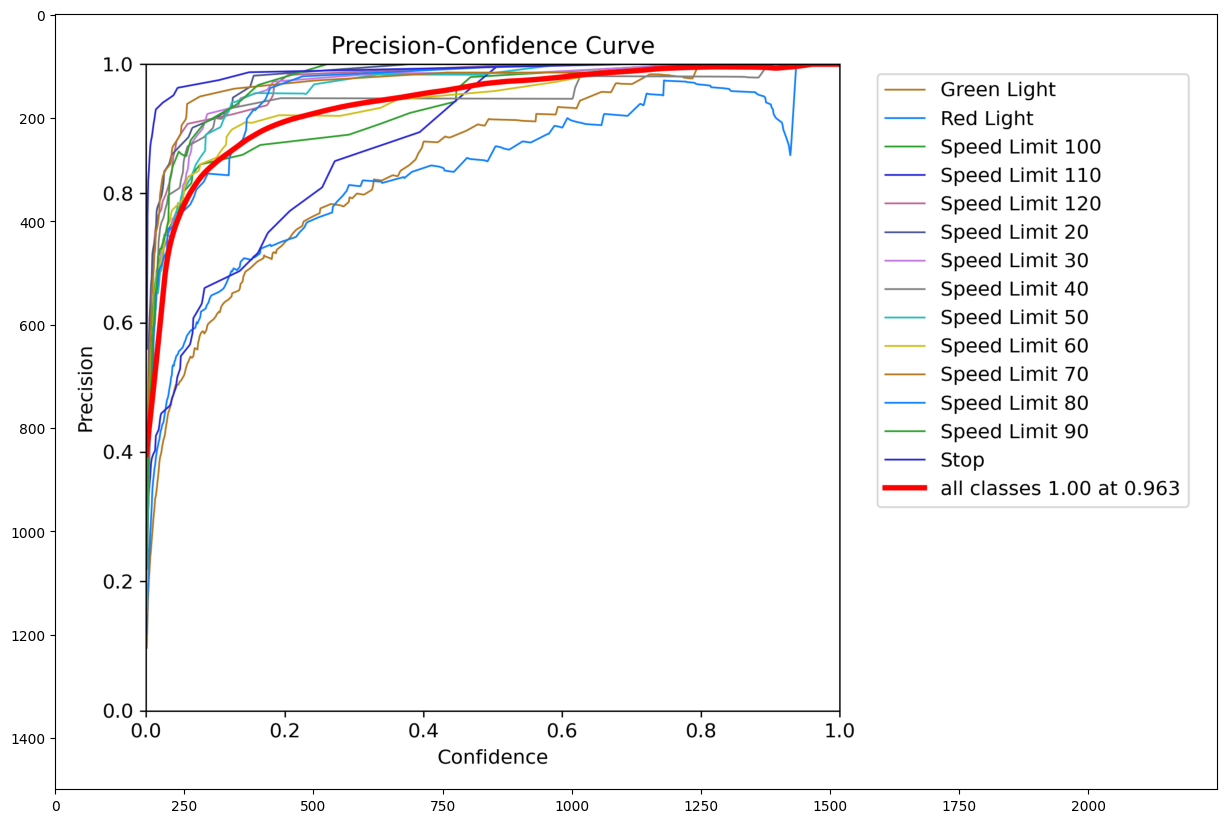

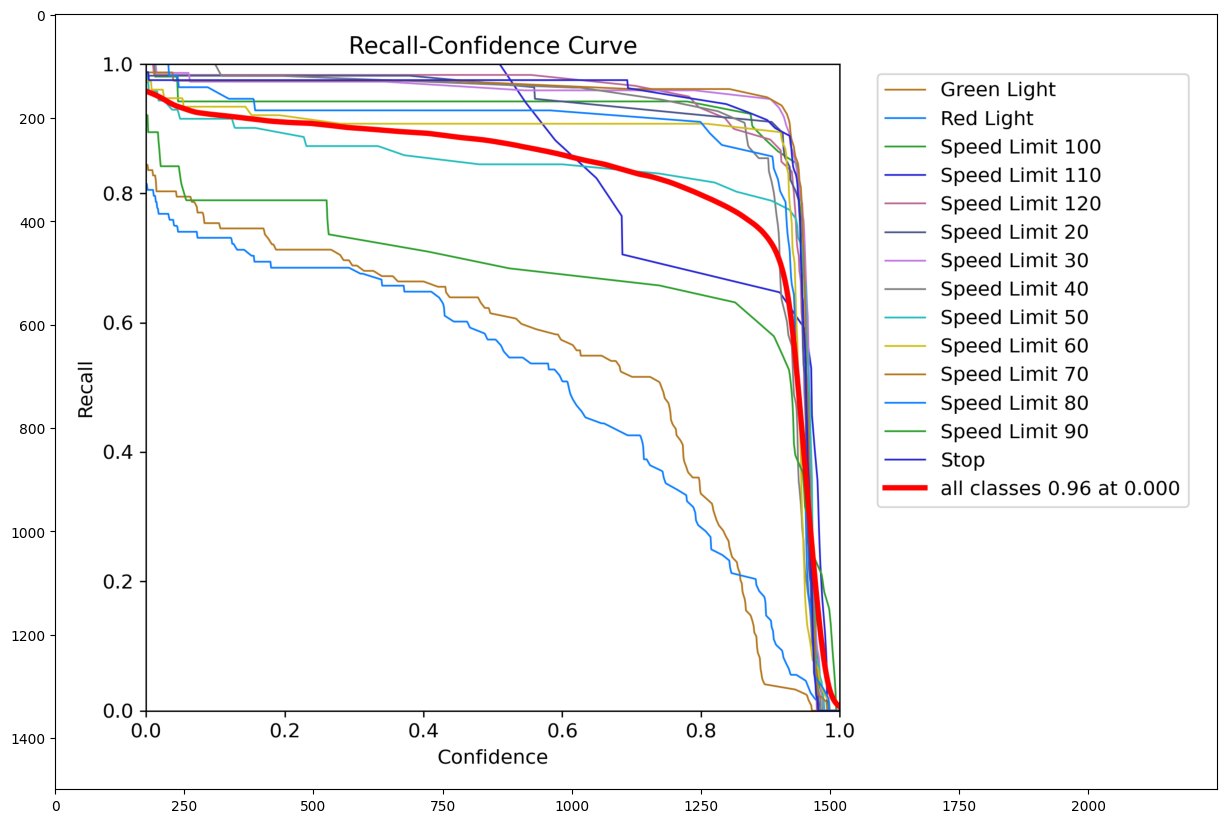

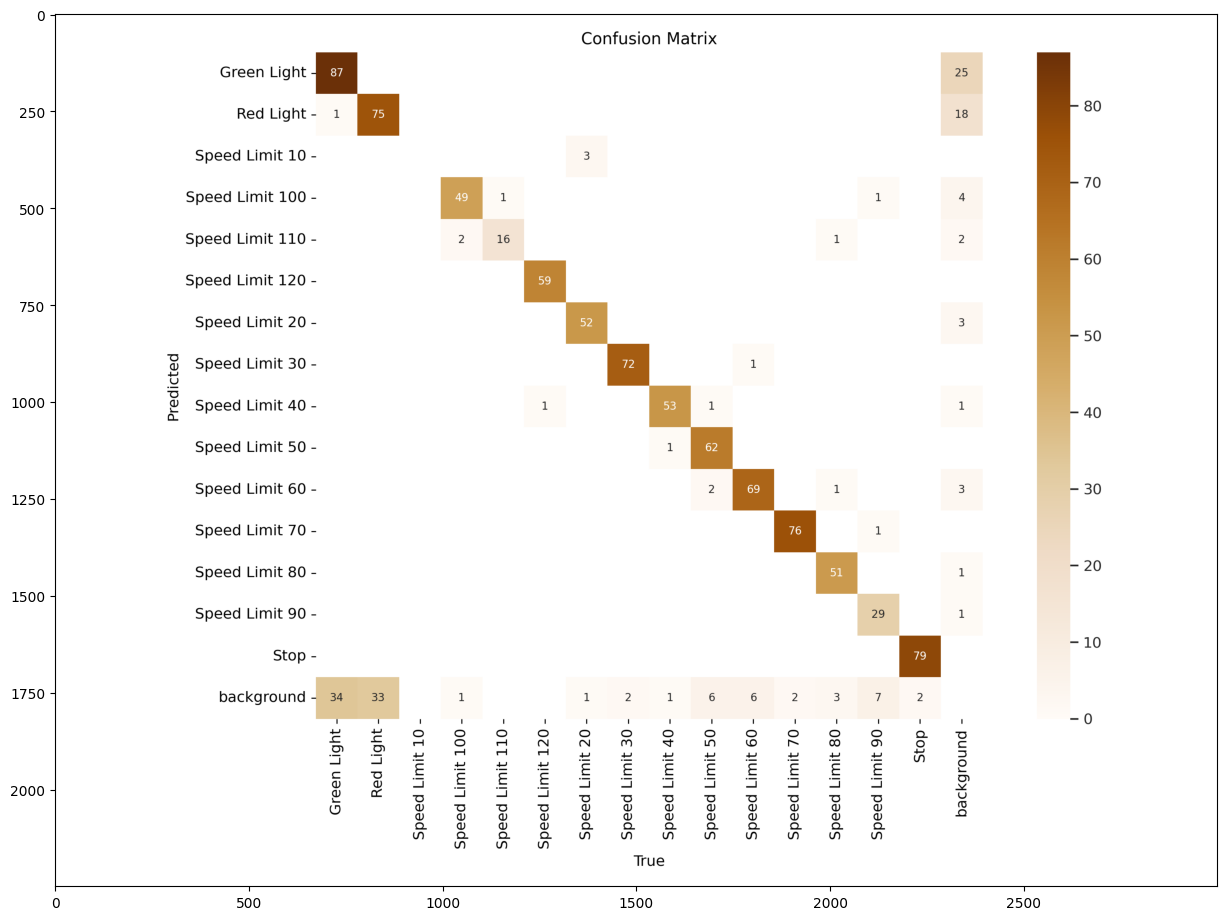

In [10]:
for i in metrics:
    img = cv2.imread(f'/kaggle/working/runs/detect/train/{i}')
    
    plt.figure(figsize= (15 , 12))
    
    plt.imshow(img)
    
    plt.show()

In [11]:
model_info = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
model_info.tail(10)

epoch        train/box_loss        train/cls_loss  \
90                    91               0.46028               0.29887   
91                    92               0.45201               0.28397   
92                    93               0.45338               0.28393   
93                    94               0.44898               0.28294   
94                    95               0.44601               0.27331   
95                    96               0.44252               0.26973   
96                    97               0.44055               0.26984   
97                    98               0.44395               0.26939   
98                    99               0.43178               0.26424   
99                   100               0.43960               0.26839   

          train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
90               0.84725               0.93666               0.89378   
91               0.84734               0.94782               0.90004   
92               0.85054               0.94936               0.90091   
93               0.84715               0.94250               0.89601   
94               0.84933               0.93156               0.90371   
95               0.84363               0.93143               0.90593   
96               0.84327               0.94292               0.89980   
97               0.84614               0.93506               0.90260   
98               0.84600               0.94864               0.88454   
99               0.84284               0.94534               0.89267   

        metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
90               0.93379               0.81863               0.54685   
91               0.93716               0.81884               0.54434   
92               0.93697               0.82156               0.54393   
93               0.93587               0.81861               0.54732   
94               0.93675               0.81925               0.54608   
95               0.93567               0.81742               0.54782   
96               0.93683               0.82013               0.54335   
97               0.93659               0.81940               0.54727   
98               0.93639               0.82016               0.54282   
99               0.93715               0.82148               0.53836   

            val/cls_loss          val/dfl_loss                lr/pg0  \
90               0.32299               0.86694              0.000057   
91               0.31731               0.86654              0.000052   
92               0.31950               0.86633              0.000047   
93               0.32619               0.86836              0.000042   
94               0.32409               0.86831              0.000037   
95               0.32206               0.86855              0.000031   
96               0.31528               0.86779              0.000026   
97               0.31550               0.86917              0.000021   
98               0.31456               0.86820              0.000016   
99               0.31251               0.86699              0.000010   

                  lr/pg1                lr/pg2  
90              0.000057              0.000057  
91              0.000052              0.000052  
92              0.000047              0.000047  
93              0.000042              0.000042  
94              0.000037              0.000037  
95              0.000031              0.000031  
96              0.000026              0.000026  
97              0.000021              0.000021  
98              0.000016              0.000016  
99              0.000010              0.000010

## Validation of the model By TestSet

In [12]:
# Loading the best performing model
valid_model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

# Evaluating on the test set
metrics = valid_model.val(split = 'test')

Ultralytics YOLOv8.2.16 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/cardetection/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:03<00:00, 166.06it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:05<00:00,  6.90it/s]


                   all        638        770      0.955      0.881      0.939      0.806
           Green Light        638        110      0.916      0.695       0.88      0.528
             Red Light        638         94      0.866      0.585      0.709      0.451
        Speed Limit 10        638          3      0.955          1      0.995      0.796
       Speed Limit 100        638         46      0.969      0.935      0.983      0.873
       Speed Limit 110        638         21      0.982       0.81       0.91      0.806
       Speed Limit 120        638         44      0.952          1      0.982      0.879
        Speed Limit 20        638         46      0.944      0.957      0.974      0.895
        Speed Limit 30        638         60      0.952      0.883      0.939      0.868
        Speed Limit 40        638         53      0.941      0.962      0.981       0.87
        Speed Limit 50        638         50      0.954      0.837      0.919      0.824
        Speed Limit 6

In [13]:
#Final Result
print("precision(B): ", metrics.results_dict['metrics/precision(B)'])
print("recall(B): ", metrics.results_dict['metrics/recall(B)'])
print("mAP50(B): ", metrics.results_dict['metrics/mAP50(B)'])
print("mAP50-95(B): ", metrics.results_dict['metrics/precision(B)'])

precision(B):  0.9551299589184663
recall(B):  0.8811449390674462
mAP50(B):  0.9391722686683869
mAP50-95(B):  0.9551299589184663


### Prediction On Test Images

In [14]:
test_dir = '/kaggle/input/cardetection/test/images'

files = [os.path.join(test_dir , file) for file in os.listdir(test_dir) if file.endswith('.jpg')]

random_imgs = random.sample(files , k=10)
for img in random_imgs:
    img = cv2.imread(img)
    results = final_model.predict([img] , save= True , imgsz = 416 , conf = 0.5 , iou = 0.7)


0: 416x416 1 Green Light, 7.5ms
Speed: 3.2ms preprocess, 7.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train2

0: 416x416 1 Speed Limit 20, 7.0ms
Speed: 1.6ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3

0: 416x416 1 Speed Limit 80, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train4

0: 416x416 2 Green Lights, 6.9ms
Speed: 1.6ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5

0: 416x416 1 Speed Limit 80, 6.7ms
Speed: 1.6ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train6

0: 416x416 1 Red Light, 6.6ms
Speed: 1.0ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train7

0

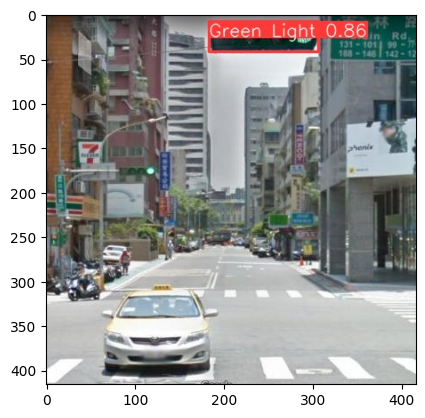

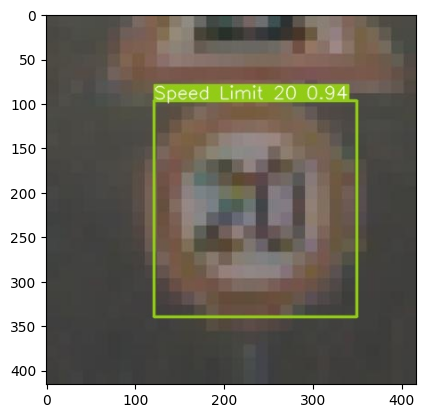

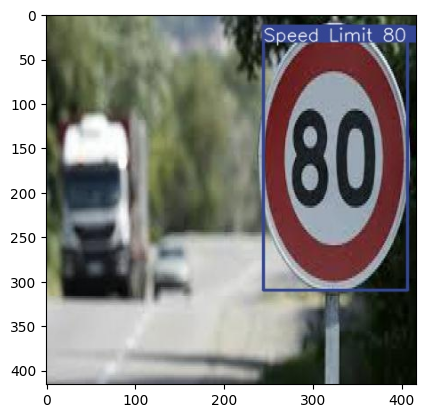

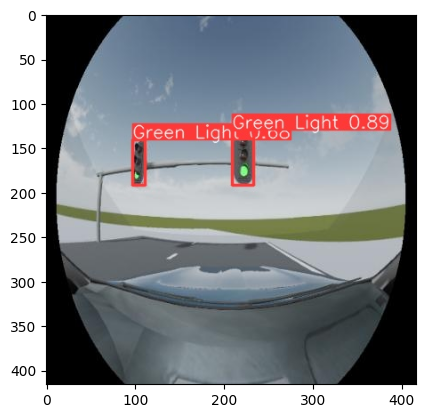

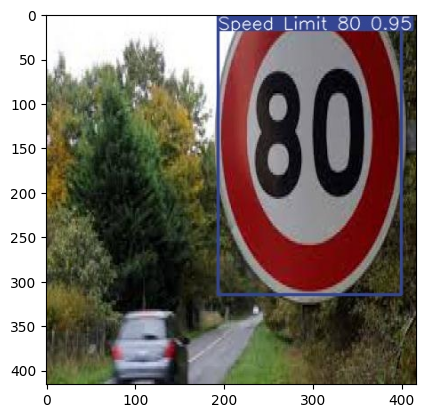

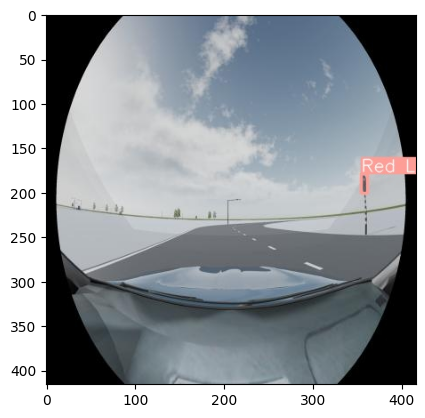

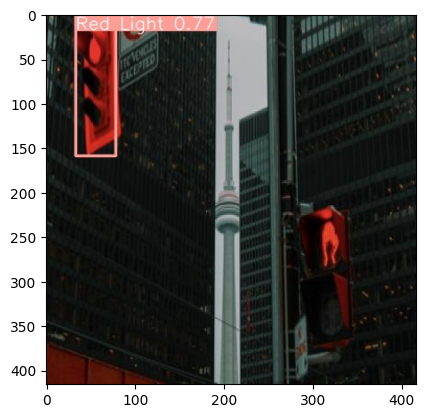

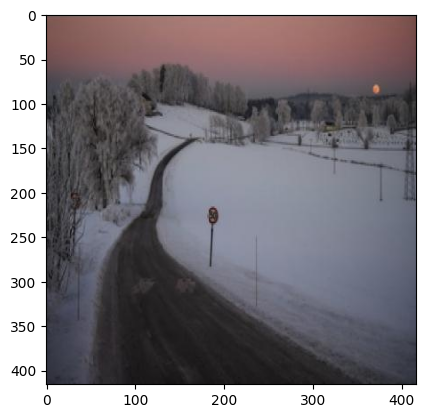

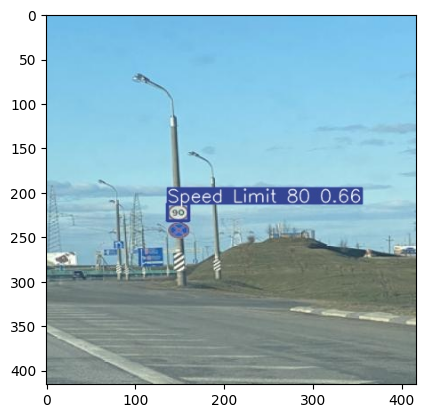

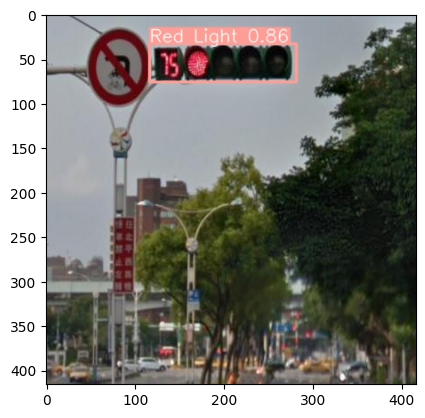

In [15]:
for i in range(2,12):
    plt.imshow(plt.imread(f"/kaggle/working/runs/detect/train{i}/image0.jpg"))
    plt.show()